# DATA ANALYSIS FOR DDoS BOTNET Dataset

In this section, we have got the cleaned dataset which basically has the complete DDoS botnet data with normal data. We have cleaned the dataset completely so that it is free of dirty data and we can easily make out insights out of the dataset. We go through two major process in our data analysis phase.

### 1. Exploratory Data Analysis

### 2. Explanatory Data Analysis

### Types of graph used:

1. BAR CHART
2. PIE CHART
3. BOX PLOTS
4. VIOLIN PLOTS


# Exploratory Data Analysis

### Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py

### Importing the dataset for analysis

In [3]:
df_original = pd.read_csv('../dataset/basic_cleaned.csv')
df = df_original.copy()

# It is a good practise to make a copy of dataset so we generated a copy for quick fixes later if necessary

### Understanding the dataset

In [4]:
df.shape

# Shape lets us know about the number of rows and columns available for our dataset

(1927085, 40)

In [5]:
df.columns

# Shows all columns available

Index(['Unnamed: 0', 'proto', 'proto_number', 'saddr', 'sport', 'daddr',
       'dport', 'pkts', 'bytes', 'state', 'dur', 'average_dur', 'stddev_dur',
       'total_dur', 'min_dur', 'max_dur', 'spkts', 'dpkts', 'sbytes', 'dbytes',
       'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP',
       'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'category', 'subcategory'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# we drop 1st column here as it is just ID and not required.

In [7]:
df_attacked = df[ (df['category'] =='DDoS') ]

# we are taking all the malicious packets data into a data frame called df_attacked

In [8]:
df_normal = df[ (df['category'] =='Normal') ]

# we are taking all the normal packets data into a data frame called df_normal

### Definitions used in our analysis work:


In [9]:
def gen_bar(column,num_observ,df_type):
    base_color = sb.color_palette()[0]
    bot_order = df_type[column].value_counts()[:num_observ].index
    sb.countplot(data = df_type, y = column, color = base_color, order = bot_order)
    
# This is a function that is used to plot a bar graph by taking three parameters:
  # 1. columns: Tells about the name of the column needed.
  # 2. num_observ: It takes the number of observations for which graph needs to be plotted.
  # 3. df_type: This parameter takes the datafram used for analysis.

In [10]:
def gen_pie(column,num_observ,df_type):
    sorted_counts = df_type[column].value_counts()[:num_observ]
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.0f%%', pctdistance=1.2, labeldistance=0.7,counterclock = False)
    plt.axis('square')
# This is a function that is used to plot a pie chart by taking three parameters:
  # 1. columns: Tells about the name of the column needed.
  # 2. num_observ: It takes the number of observations for which graph needs to be plotted.
  # 3. df_type: This parameter takes the datafram used for analysis.

## 1.What are the different type of protocols available? 

In [11]:
df.proto.unique()

# unique method is used to get the unique values available for that particular column.

array(['tcp', 'arp', 'udp', 'ipv6-icmp'], dtype=object)

In [12]:
df.proto.value_counts()

# value count tells us about the number of observations per unique entities in descending order.

tcp          978397
udp          948598
arp              82
ipv6-icmp         8
Name: proto, dtype: int64

### Insights:
We have the majority of the data in dataset that consist of TCP and UDP protocols. There are very few samples of ARP and ICMP protocol.

## 2.Who are the top bots initiating the DDoS attacks?

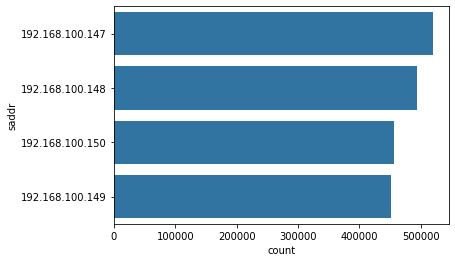

In [12]:
gen_bar('saddr',4,df_attacked)

# we called the function to generate the bar graph for top 4 values of senders address in malicious dataset.

## Which device from our dataset has initiated the most number of packets without an attack

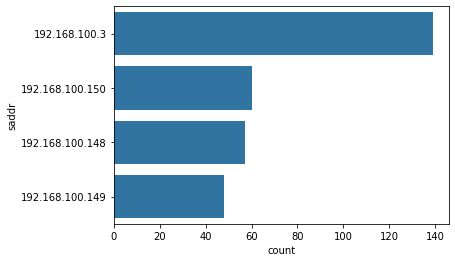

In [93]:
gen_bar('saddr',4,df_normal)

# we called the function to generate the bar graph for top 4 values of senders address in normal dataset.

### Insights:
1.From this bar graph we can understand that 192.168.100.147 has sent out the most number of attack packets in our system. 

2.In normal case 192.168.100.3 has sent the most packets, this could be because most of the attacks were received at this bot and hence it replies the most

## 3.Which IP's were at destination? 

In [98]:
df.daddr.value_counts().iloc[:4]

# getting top 4 counts from destination address.

192.168.100.3      1923162
192.168.100.147       1336
192.168.100.150       1313
192.168.100.149        579
Name: daddr, dtype: int64

### Insights:
1.We can see that the most number of packets were received on our device with IP 192.168.100.3

## 4. Top ports from which attacks were initiated and received?

In [14]:
df_attacked.sport.value_counts()

# getting the count of values of the senders port number.

 80       3485
-1          35
 54168      31
 42038      31
 41722      31
          ... 
 26833      27
 26820      27
 26817      27
 2152       27
 26804      27
Name: sport, Length: 65537, dtype: int64

In [15]:
df_attacked.dport.value_counts()

# getting the count of values of the destination port number.

 80       1923117
-1             35
 6451           2
 6394           2
 6457           2
           ...   
 40424          1
 6648           1
 29173          1
 39400          1
 8196           1
Name: dport, Length: 3409, dtype: int64

### Insights:
1.We can see that highest number that is almost the entire dataset has the devices being attacked through port 80. 

2.We know that this is the HTTP port and is the most open port available in devices. It is also the port through which the highest number of attacks were initiated.

## 5.Describe the statistics of attack packet count in transaction

In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_attacked.pkts.describe()

# getting a statistics of malicious packet count in each transaction

count   1926608.00000
mean          7.33000
std           3.71533
min           1.00000
25%           5.00000
50%           7.00000
75%          10.00000
max          20.00000
Name: pkts, dtype: float64

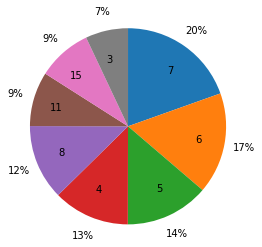

In [17]:
gen_pie('pkts',8,df_attacked)

# generating a pie chart for attack dataset about the packets per transcition number.

### How it differs from normal packets?

In [18]:
df_normal.pkts.describe()

# getting a statistics of normal packet count in each transaction

count     477.00000
mean     2366.16143
std      9847.58736
min         1.00000
25%         2.00000
50%         2.00000
75%         2.00000
max     70057.00000
Name: pkts, dtype: float64

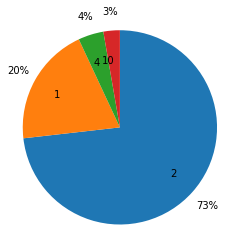

In [19]:
gen_pie('pkts',4,df_normal)

# generating a pie chart for normal dataset about the packets per transcition number.

## Insights:

1.Here we have the total count of packets sent from bot to the devices.

2.The mean number packets send from bots is around 7-8. The maximum number sent is 20 and minimum being 1.

3.From the above statistics we can find that upto 75% of the packets send were more than 5 in number . This makes understand that most of the attcked packets has packet number in transaction more than 5.

4.20% of attack data has packet count of 7 in transaction followed by 6 for 17%.

5.73% of normal dataset has packet count of 2 followed by 1 with 20%.


## 6.Describe the statistics of attack bytes count in transaction

In [20]:
df_attacked.bytes.describe()

# getting a statistics of malicious bytes in each transmission

count   1926608.00000
mean        615.24861
std         227.91679
min          60.00000
25%         420.00000
50%         616.00000
75%         780.00000
max        6322.00000
Name: bytes, dtype: float64

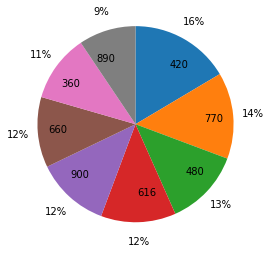

In [21]:
gen_pie('bytes',8,df_attacked)

# generating a pie chart for attack dataset for bytes involved in transmission of the packet.

### How it differs from normal packets?

In [22]:
df_normal.bytes.describe()

# getting a statistics of normal bytes in each transmission

count        477.00000
mean     2064511.46751
std      9636728.40103
min           60.00000
25%          172.00000
50%          183.00000
75%          891.00000
max     71833345.00000
Name: bytes, dtype: float64

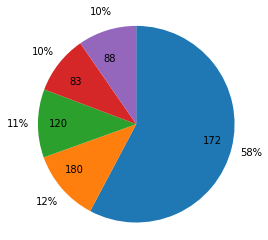

In [13]:
gen_pie('bytes',5,df_normal)

# generating a pie chart for normal dataset for bytes involved in transmission of the packet.

### Insights:
1.The average number of bytes in transaction is around 615 for attacked packets.

2.The max is 6322 and min is around 60 for the malicious packets.

3.14% of the malicious packet that is the highest number of bytes.

4.In case of normal packets almost half..ie: 50% packets has 172 bytes in transaction.

## 7.What are the different states of transactions going on?

In [94]:
sorted_counts = df['state'].value_counts()
sorted_counts

# Sorting the state of transaction

INT    948382
REQ    538593
RST    437281
ACC      2476
CON       329
FIN        16
NRS         8
Name: state, dtype: int64

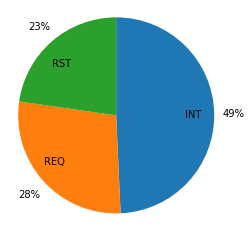

In [25]:
gen_pie('state',3,df_attacked)

# generating pie chart for top 3 state value in malicious dataset

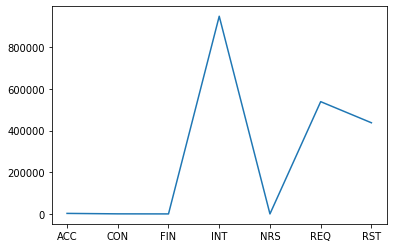

In [26]:
df['state'].value_counts().sort_index().plot.line()

# getting a line plot about the states.

### How it differs from normal packets?

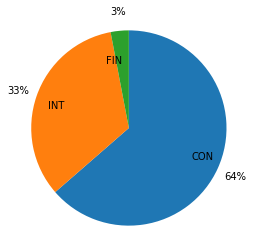

In [27]:
gen_pie('state',3,df_normal)

# generating pie chart for top 3 state value in normal dataset

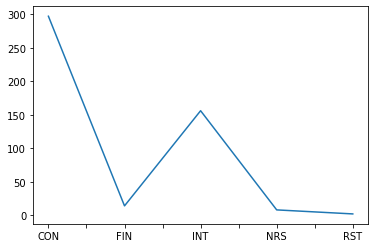

In [28]:
df_normal['state'].value_counts().sort_index().plot.line()

# getting a line plot about the states.

### Insights:

1.INT is the highest number of state of which transaction happend in case of malicious packet and 49% of entire dataset has it.

2.64% of the normal dataset has CON as it state.

## 8.how is the duration of malicious packet transfer varying across the dataset and how its properties differ from normal dataset?


In [29]:
df_attacked.dur.describe()

# statistics about duration of packet transfer of attack dataset

count   1926608.00000
mean         14.79853
std           8.78071
min           0.00000
25%          12.12172
50%          13.68447
75%          14.54814
max         113.55770
Name: dur, dtype: float64

In [30]:
df_attacked.dur.value_counts()

# value counts of duration of attacked packets

0.00000     84237
12.16235      182
12.38465      169
13.96231      167
12.38396      166
            ...  
11.72395        1
11.13496        1
14.42168        1
9.80110         1
14.89982        1
Name: dur, Length: 368670, dtype: int64

In [51]:
df_normal.dur.value_counts()

0.000000       80
1685.706909     4
0.007321        2
2.501101        2
1745.807861     2
               ..
0.010024        1
0.144507        1
0.282753        1
0.007486        1
1936.802368     1
Name: dur, Length: 386, dtype: int64

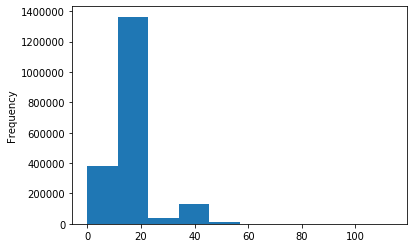

In [31]:
df_attacked['dur'].plot.hist()

# plotting a histogram for attacked packet duration across the dataset

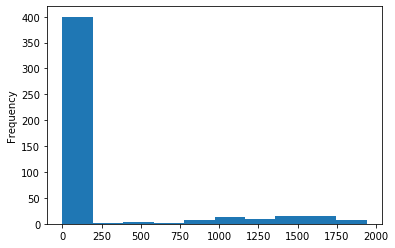

In [32]:
df_normal['dur'].plot.hist()

# plotting a histogram for normal packet duration across the dataset

### Insight:

1.Most of the dataset of malicious packets belongs to around range 0 to 20. Around 14 being the average.

2.Highest number of duration of attacked packets is around 12-13.

2.From histogram we can see that in case of notmal packets there are a few outliers and the raph is completely skewed towards the left.

## 10.How is statistics of the average duration of malacious aggregate records and how it differs with normal packets?

In [33]:
df_attacked.average_dur.describe()

count   1926608.00000
mean          2.54962
std           1.40421
min           0.00000
25%           2.01624
50%           2.75982
75%           3.65986
max           4.98188
Name: average_dur, dtype: float64

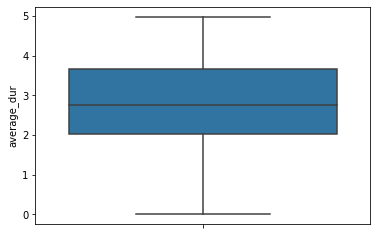

In [34]:
sb.boxplot( y=df_attacked["average_dur"] )

# making box plot for attacked dataset average duration.

In [35]:
df_normal.average_dur.describe()

count   477.00000
mean      0.49936
std       1.33180
min       0.00000
25%       0.00000
50%       0.00749
75%       0.18034
max       4.96714
Name: average_dur, dtype: float64

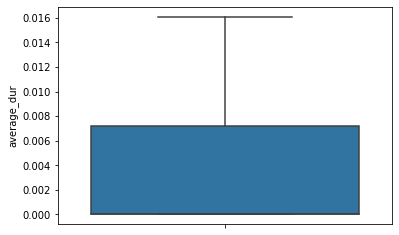

In [36]:
sb.boxplot( y=df_normal[df_normal["average_dur"] < 0.02].average_dur )

# making box plot for normal dataset average duration.

### Insights:

1.The average of avg duration of attack packet in transaction is aroud 2.75

2.From the boxplot we can see that for attacked packet most of the values lies around within 2 to 4 range. So we can tell this is a character of bots.

3.In case of normal packets, there were few outliers and needed to be removed. We find that most of normal packets range around 0 to 0.008. Thas a low average duration.


## 11.How is statistics of the standard deviation of  duration of malcious aggregate records? amd how it differs from normal packet?

In [37]:
df_attacked.stddev_dur.describe()

count   1926608.00000
mean          0.94536
std           0.75180
min           0.00000
25%           0.12302
50%           0.93764
75%           1.69009
max           2.49676
Name: stddev_dur, dtype: float64

In [38]:
df_attacked.stddev_dur.value_counts()

0.00000    208507
1.92082       204
1.91372       174
1.90994       152
1.91140       152
            ...  
1.64472         1
0.21885         1
1.52715         1
0.15681         1
0.82219         1
Name: stddev_dur, Length: 277624, dtype: int64

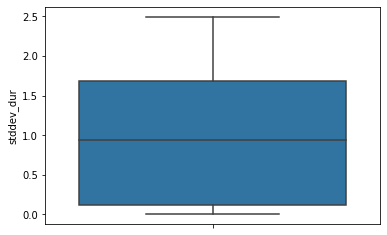

In [39]:
sb.boxplot( y=df_attacked["stddev_dur"] )

In [40]:
df_normal.stddev_dur.describe()

count   477.00000
mean      0.03933
std       0.18975
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.89318
Name: stddev_dur, dtype: float64

In [99]:
df_normal.stddev_dur.value_counts()

0.00000    384
0.00003      4
0.00001      2
0.00002      2
0.00002      2
          ... 
0.00003      1
0.00005      1
0.00022      1
0.08015      1
0.09645      1
Name: stddev_dur, Length: 87, dtype: int64

### Insights:

1.Standard deviation of the attacked packets has a average around 0.9.

2.The max standard deviation for the attacked packets is around 2.4

3.From the boxplot of attacked packet we can see that most values for standard deviation lies around 0 to 2.

## 12.How is the statistics of total duration of malcious aggregate records and how it differs from normal packets?

In [41]:
df_attacked.total_dur.describe()

count   1926608.00000
mean          7.22696
std           4.08917
min           0.00000
25%           4.54430
50%           8.11687
75%          10.52129
max          16.91227
Name: total_dur, dtype: float64

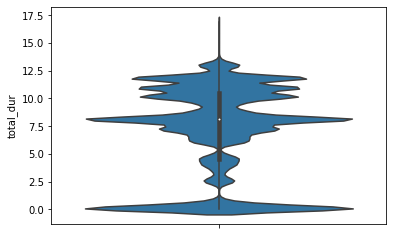

In [42]:
sb.violinplot( y=df_attacked["total_dur"] )

# adding violin plot for attacked dataset for total duration

In [101]:
df_normal.total_dur.describe()

count    477.00000
mean     127.79135
std      431.35016
min        0.00000
25%        0.00000
50%        0.00749
75%        0.21589
max     1913.19360
Name: total_dur, dtype: float64

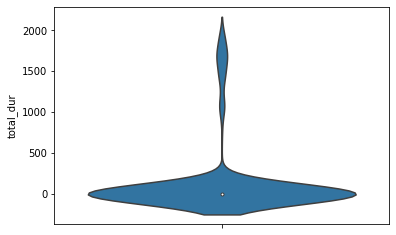

In [44]:
sb.violinplot( y=df_normal["total_dur"] )

# adding violin plot for normal dataset for total duration

### Insights:

1.The mean duration of malicious aggregate record is around 7. THe maximum is around 16.

2.From the violin plot we can see that most of the packets from 4 to 11 range for malicious packets.

3.Normal packets are mostly 0 and skewed towards the left.


## 13.Describe about the min duration of records and how it effects the bots in theory and how is it different from normal packets?

In [45]:
df_attacked.min_dur.describe()

count   1926608.00000
mean          1.30186
std           1.49105
min           0.00000
25%           0.00000
50%           0.16964
75%           2.76341
max           4.98047
Name: min_dur, dtype: float64

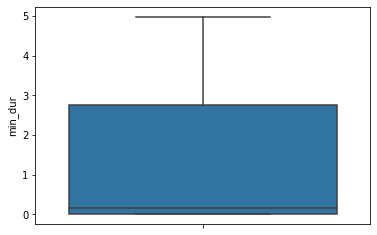

In [46]:
sb.boxplot( y=df_attacked["min_dur"] )

In [47]:
df_normal.min_dur.describe()

count   477.00000
mean      0.31378
std       0.95451
min       0.00000
25%       0.00000
50%       0.00743
75%       0.16901
max       4.95045
Name: min_dur, dtype: float64

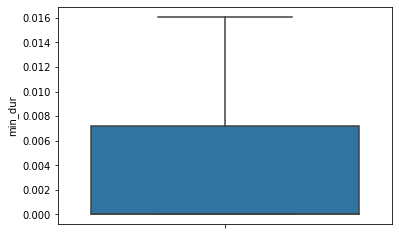

In [48]:
sb.boxplot( y=df_normal[df_normal["min_dur"] < 0.0175].min_dur )

### Insights:

1.The avergae of minimum duration of attacked packets is around 1.4.

2.We can see that most of the attacked packets range from 0 to 3.

3.The normal packets has outliers which when eliminated we get a range from 0 to 0.008, which is comparetevely low.

## 14.Describe about the max duration of records and how it effects the bots in theory and how is it different from normal packets?

In [49]:
df_attacked.max_dur.describe()

count   1926608.00000
mean          3.34896
std           1.64657
min           0.00000
25%           3.26208
50%           4.05764
75%           4.17246
max           5.00000
Name: max_dur, dtype: float64

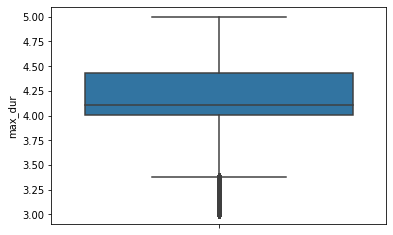

In [43]:
sb.boxplot( y=df_attacked[df_attacked["max_dur"] > 3].max_dur )

In [51]:
df_normal.max_dur.describe()

count   477.00000
mean      0.53850
std       1.39801
min       0.00000
25%       0.00000
50%       0.00749
75%       0.21490
max       5.00000
Name: max_dur, dtype: float64

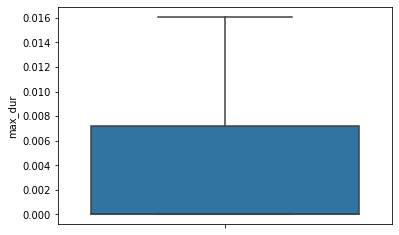

In [37]:
sb.boxplot( y=df_normal[df_normal["max_dur"] < 0.02].max_dur )

### Insights:

1.The average of max duration of bots is around 4

2.Almost 50 precentile of data of infected packets is around 4.

3.Most of the malicious packets ranges from 3 to 4.5.

4.Most of the normal packets are around range of 0.

## 15.Which are the top Source-to-destination packet count for malicious packets and what about normal packets ?

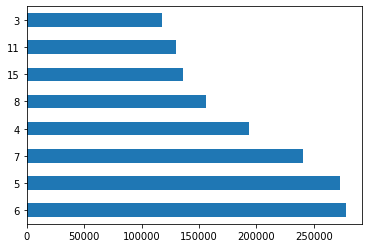

In [53]:
df_attacked.spkts.value_counts()[:8].plot(kind='barh')

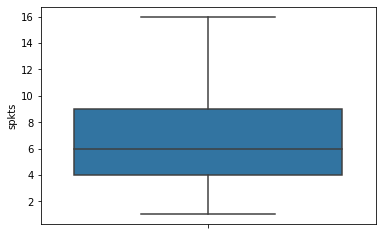

In [54]:
sb.boxplot( y=df_attacked["spkts"] )   

In [55]:
df_attacked.spkts.describe()

count   1926608.00000
mean          7.02265
std           3.80054
min           1.00000
25%           4.00000
50%           6.00000
75%           9.00000
max          16.00000
Name: spkts, dtype: float64

In [56]:
df_normal.spkts.describe()

count     477.00000
mean     1728.58700
std      6527.30286
min         1.00000
25%         1.00000
50%         1.00000
75%         2.00000
max     35029.00000
Name: spkts, dtype: float64

In [57]:
df_normal["spkts"].value_counts()[:5]

1    306
2     84
5     12
3      9
4      6
Name: spkts, dtype: int64

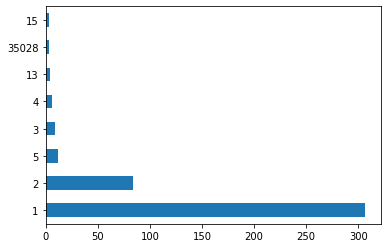

In [23]:
df_normal.spkts.value_counts()[:8].plot(kind='barh')

### Insights:

1.If we look at the source to destination packet count for malicious data has value around 6 followed by 5 and 7.

2.The avergae is around 7 for malicious dataset, and around 1 for benign dataset.

3.The highest number of normal counts is 306.

## 16.Which are the top Destination-to-source packet count for malicious packets and how does it effect the packet?

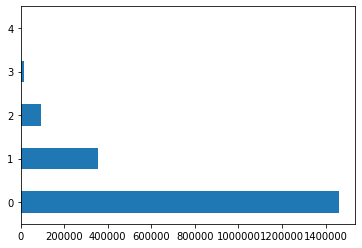

In [58]:
df_attacked.dpkts.value_counts()[:8].plot(kind='barh')

In [59]:
df_attacked["dpkts"].describe()

count   1926608.00000
mean          0.30734
std           0.60690
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           4.00000
Name: dpkts, dtype: float64

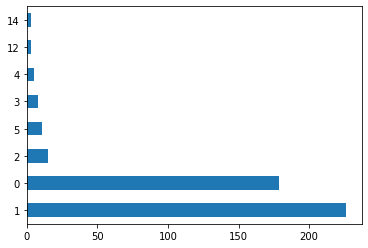

In [102]:
df_normal.dpkts.value_counts()[:8].plot(kind='barh')

In [60]:
df_normal["dpkts"].describe()

count     477.00000
mean      637.57442
std      4311.35678
min         0.00000
25%         0.00000
50%         1.00000
75%         1.00000
max     35029.00000
Name: dpkts, dtype: float64

### Insights:
1.The Destination-to-source packet count for malicious packets has an most of its packets with a value 0.

2.In case of normal packets most number of packets has around 1 as value followed by 0.

## 17.Describe and how is value counts for Source-to-destination byte count for malicious packets and normal packets.

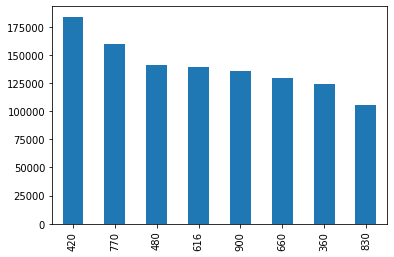

In [61]:
df_attacked.sbytes.value_counts()[:8].plot(kind="bar")

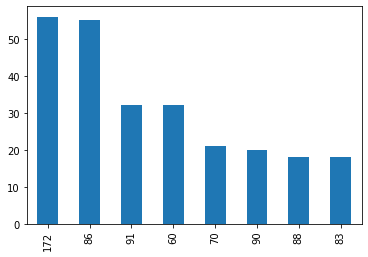

In [45]:
df_normal.sbytes.value_counts()[:8].plot(kind="bar")

In [62]:
df_attacked.sbytes.describe()

count   1926608.00000
mean        596.53847
std         216.14277
min          60.00000
25%         420.00000
50%         616.00000
75%         770.00000
max        5548.00000
Name: sbytes, dtype: float64

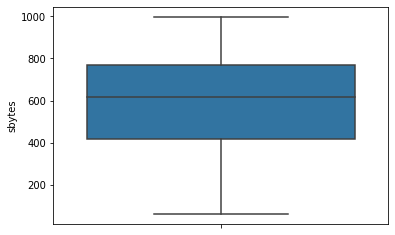

In [63]:
sb.boxplot( y=df_attacked[df_attacked["sbytes"] < 1000].sbytes )   

In [64]:
df_normal.sbytes.describe()

count        477.00000
mean     1442486.37945
std      6147351.39433
min           42.00000
25%           86.00000
50%           92.00000
75%          172.00000
max     37747017.00000
Name: sbytes, dtype: float64

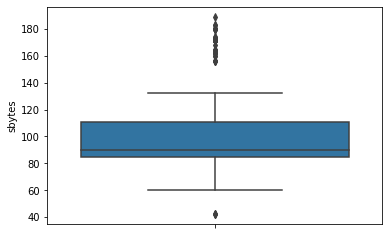

In [47]:
sb.boxplot( y=df_normal[df_normal["sbytes"]  < 200 ].sbytes )   

### Insights:

1.The value count of 420 is highest for Source-to-destination byte count for malicious packets.

2.596 is the average value for byte count in malicious packets.

3.The minimum count in malocious packets remain 60.

4.Most of the values of count in malicious packets range from 400 to 800.

5.In case of normal packets the range of values is from 80 to 120.

6.42 remains the min count for normal packets.

## 18.Describe and how is value counts for Destination-to-source byte count for malicious packets.

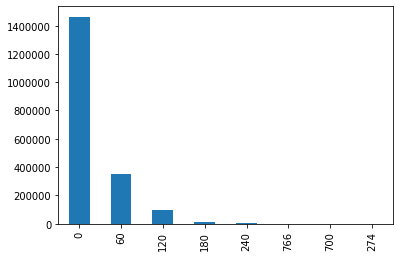

In [66]:
df_attacked.dbytes.value_counts()[:8].plot(kind="bar")

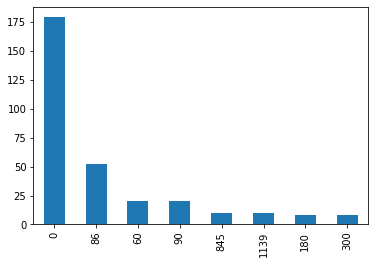

In [48]:
df_normal.dbytes.value_counts()[:8].plot(kind="bar")

In [67]:
df_attacked.dbytes.describe()

count   1926608.00000
mean         18.71014
std          39.76166
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max         774.00000
Name: dbytes, dtype: float64

In [68]:
df_attacked.dbytes.value_counts()

0      1463327
60      353229
120      93356
180      14413
240       1286
766        810
700        176
274          9
774          2
Name: dbytes, dtype: int64

In [69]:
df_get_attacked = df_attacked[df_attacked["dbytes"] != 0]
df_get_attacked["dbytes"].describe()

count   463281.00000
mean        77.80832
std         44.45672
min         60.00000
25%         60.00000
50%         60.00000
75%         60.00000
max        774.00000
Name: dbytes, dtype: float64

In [70]:
df_normal.dbytes.describe()

count        477.00000
mean      622025.08805
std      4296180.13084
min            0.00000
25%            0.00000
50%           86.00000
75%          390.00000
max     34181742.00000
Name: dbytes, dtype: float64

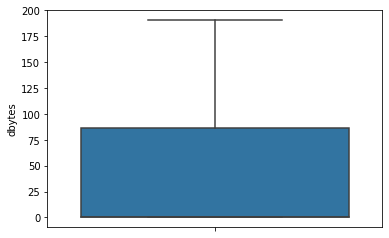

In [71]:
sb.boxplot( y=df_normal[df_normal["dbytes"]  < 200 ].dbytes )   

### Insights:

1.The value counts for Destination-to-source byte count for malicious packets has an average count of 60.

2.In case of normal packets its values ranges from 0 to 90.

## 19.Describe Total packets per second in transaction on malicious packets and how it effects malware and how it differs from normal packets.

In [72]:
df_attacked.rate.describe()

count   1926608.00000
mean          0.64506
std          31.38203
min           0.00000
25%           0.27143
50%           0.46379
75%           0.65156
max       43478.26172
Name: rate, dtype: float64

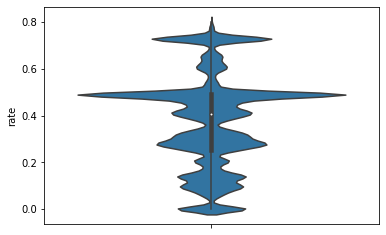

In [50]:
sb.violinplot( y=df_attacked[df_attacked["rate"]  < 0.8].rate )   

In [74]:
df_normal.rate.describe()

count     477.00000
mean     1068.10346
std      7232.16636
min         0.00000
25%         0.22794
50%         4.55544
75%        39.86750
max     90909.09375
Name: rate, dtype: float64

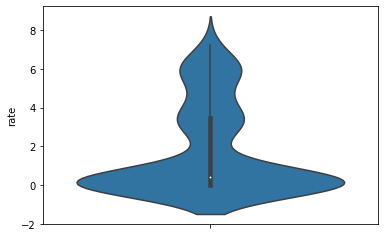

In [49]:
sb.violinplot( y=df_normal[df_normal["rate"]  < 8].rate )   

### Insights:

1.The average value of total packets per sec in transaction is 0.6.

2.For normal packets the average is around 0 to 1.

3.Value ranges from 0.2 to 0.5 for malicious while from 0 to 4 for normal.

## 20.Describe Source-to-destination packets per second

In [76]:
df_attacked.srate.describe()

count   1926608.00000
mean          0.51535
std           0.60616
min           0.00000
25%           0.24986
50%           0.41008
75%           0.63466
max           7.33945
Name: srate, dtype: float64

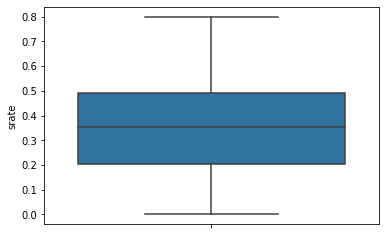

In [77]:
sb.boxplot( y=df_attacked[df_attacked["srate"]<0.8].srate)

In [78]:
df_normal.srate.describe()

count       477.00000
mean       5943.69924
std       58124.55734
min           0.00000
25%           0.00000
50%           0.00000
75%           0.39981
max     1000000.00000
Name: srate, dtype: float64

In [79]:
df_normal.srate.value_counts()

0.00000         306
0.00275           8
0.00111           4
0.39981           3
250000.00000      2
               ... 
8.00436           1
0.00991           1
0.12859           1
0.39996           1
10.01695          1
Name: srate, Length: 147, dtype: int64

In [80]:
df_get_attacked = df_attacked[df_attacked["srate"] != 0]
df_get_attacked["srate"].value_counts()

1.00271    813
0.49449    791
0.48444    782
0.48450    768
0.49070    757
          ... 
2.33391      1
3.51791      1
0.24936      1
4.63800      1
4.85991      1
Name: srate, Length: 68496, dtype: int64

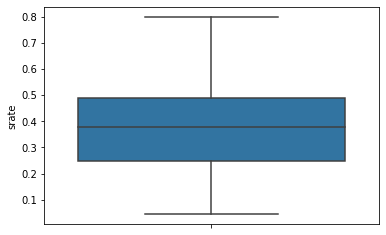

In [81]:
sb.boxplot( y=df_get_attacked[df_get_attacked["srate"] < 0.8].srate)

### Insights:

1.The rate values from 0.2 to 0.5 for attack packets.

2.1 being highest value count upto 813 values for attacked packet rate

## 21.Describe Destination-to-source packets per second

In [82]:
df_attacked.drate.describe()

count   1926608.00000
mean          0.00704
std           0.03567
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.06458
Name: drate, dtype: float64

In [83]:
df_attacked.drate.value_counts()

0.00000    1816556
0.02771        135
0.07141        123
0.02709        122
0.06634        116
            ...   
0.61269          1
0.68018          1
0.24954          1
0.61696          1
0.31434          1
Name: drate, Length: 6713, dtype: int64

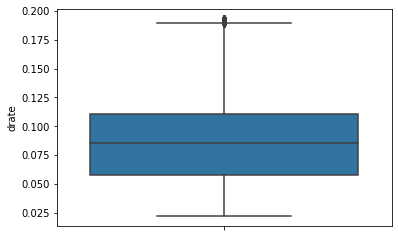

In [84]:
df_get_attacked = df_attacked[df_attacked["drate"] != 0]
sb.boxplot( y=df_get_attacked[df_get_attacked["drate"] < 0.2].drate)

In [85]:
df_normal.drate.describe()

count    477.00000
mean      11.02854
std      133.64322
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max     2178.64917
Name: drate, dtype: float64

In [86]:
df_normal.drate.value_counts()

0.00000       405
0.00275         8
17.63355        2
0.00176         2
3.67242         1
             ... 
1206.27258      1
7.61219         1
0.00159         1
8.60459         1
0.00914         1
Name: drate, Length: 64, dtype: int64

## What are the different subcategories of attacks?

In [11]:
df_attacked.subcategory.value_counts()

TCP     977380
UDP     948239
HTTP       989
Name: subcategory, dtype: int64

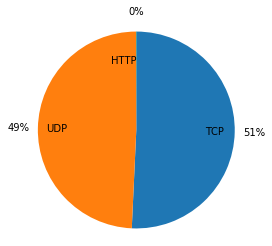

In [14]:
gen_pie('subcategory',3,df_attacked)

### Insight:

1.Attack packets have count around 0.05 to 0.125

2.Most of normal packets rate is 0.


## 22.How are these features used for getting flow based features in dataset?


#### After collecting the pcap files, the Argus tool was used to generate the relevant network flows. The pcap files were converted into Argus format by using the Argus client program.

#### Then, the sql insert command was applied to extract network flow information, and simultaneously log the extracted features into MySQL tables.

#### The final features produced by Argus during the Network flow extraction process.

#### Additionally, the group ‘saddr’, ‘sport’, ‘daddr’, ‘dport’, ‘proto’ are considered network flow identifiers, as this information is capable of uniquely identifying a flow at any given time and assisting in the labeling process. 

#### To label the data for use with machine learning processes, employed ‘alter table’queries to introduce the new columns and ‘update’queries to modify the values based on saddr and daddr values. In the dataset, attack  instances are labeled with ‘1’and normal ones are labeled with ‘0’for training and validating machine learning models through a binary classification.
